In [1]:
# import libraries
import os
from glob import glob 
import cv2 # image processing
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization

from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.layers import  Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator,image,img_to_array,load_img

Using TensorFlow backend.


In [2]:
input_path = "../input/chest-xray-pneumonia/chest_xray/"
train_path = input_path +"train/"
test_path = input_path +"test/"
val_path = input_path +"val/"

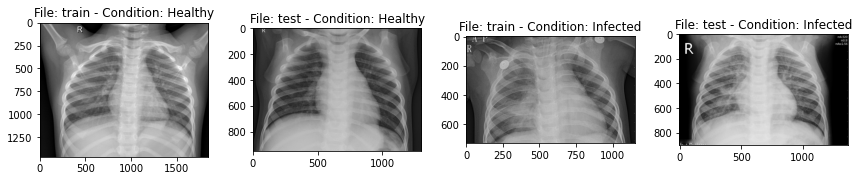

In [3]:
fig, ax = plt.subplots(1,4, figsize=(12,12))
ax = ax.ravel()
plt.tight_layout()
for i, _set in enumerate(['train', 'test']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/NORMAL/'+os.listdir(set_path+'/NORMAL')[0]),cmap='gray')
    ax[i].set_title('File: {} - Condition: Healthy'.format(_set))
    ax[i+2].imshow(plt.imread(set_path+'/PNEUMONIA/'+os.listdir(set_path+'/PNEUMONIA')[0]),cmap='gray')
    ax[i+2].set_title('File: {} - Condition: Infected'.format(_set))

In [4]:
# Data Augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [5]:
# Create Model with KERAS library
model = Sequential()

model.add(Conv2D(32, (3,3), activation="relu",input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 256)      

In [6]:
# Compile Mode
model.compile(loss='binary_crossentropy',
              optimizer= RMSprop(lr=2e-5),
              metrics=['acc'])

In [7]:
# Fit Model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=175,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=10
)

Epoch 1/100
175/175 [==============================] - 63s 362ms/step - loss: 0.5867 - acc: 0.7446 - val_loss: 0.6301 - val_acc: 0.6450
Epoch 2/100
175/175 [==============================] - 60s 341ms/step - loss: 0.5633 - acc: 0.7471 - val_loss: 0.6526 - val_acc: 0.6100
Epoch 3/100
175/175 [==============================] - 57s 328ms/step - loss: 0.5395 - acc: 0.7386 - val_loss: 0.7485 - val_acc: 0.6100
Epoch 4/100
175/175 [==============================] - 59s 336ms/step - loss: 0.4922 - acc: 0.7580 - val_loss: 0.7059 - val_acc: 0.5870
Epoch 5/100
175/175 [==============================] - 56s 319ms/step - loss: 0.4320 - acc: 0.7983 - val_loss: 0.2930 - val_acc: 0.7500
Epoch 6/100
175/175 [==============================] - 56s 323ms/step - loss: 0.4158 - acc: 0.8040 - val_loss: 0.6189 - val_acc: 0.7500
Epoch 7/100
175/175 [==============================] - 57s 328ms/step - loss: 0.3908 - acc: 0.8198 - val_loss: 0.4587 - val_acc: 0.7391
Epoch 8/100
175/175 [===========================

In [8]:
# model save
model.save_weights("cnn-example-pneumonia.h5")

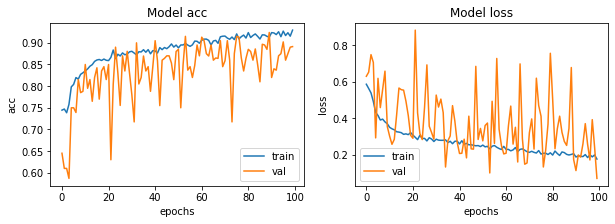

In [9]:
# Visualize Loss and Accuracy Rates
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['acc', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])